In [1]:
# Import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pdpbox
from pdpbox import pdp, get_dataset, info_plots
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
# Read In and Explore the Data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
# Data Analysis
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
# Display summary statistics for numerical features
print(train_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [5]:
# Display the first few rows of the data
print(train_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


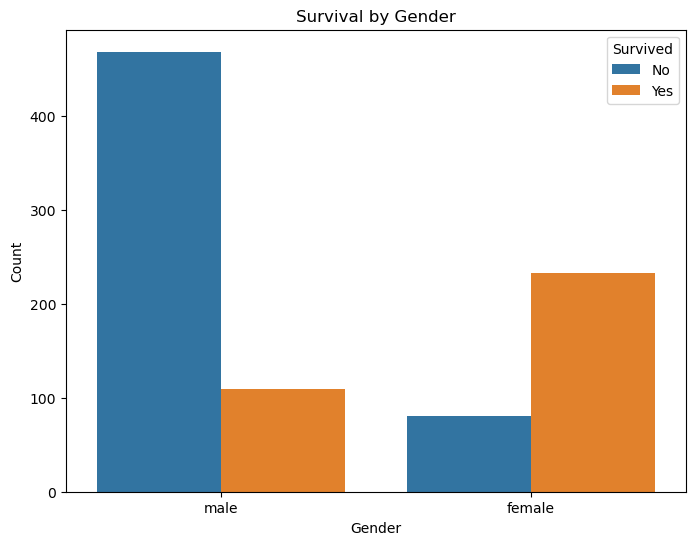

In [6]:
# Visualize survival by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

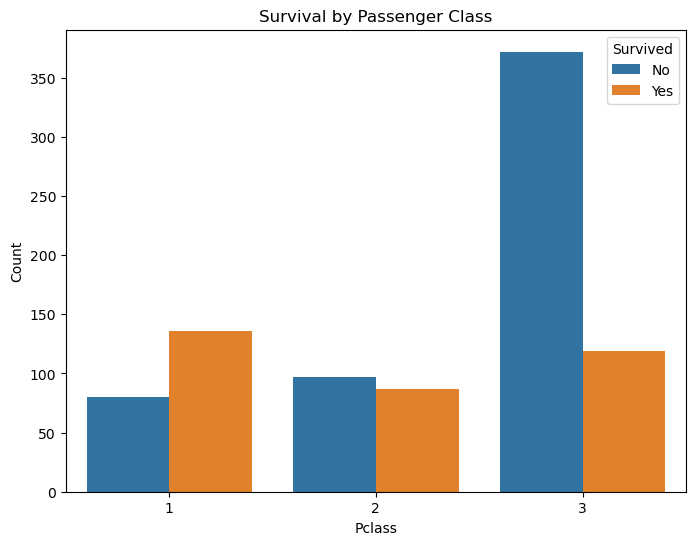

In [7]:
# Visualize survival by passenger class (Pclass)
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=train_data)
plt.title('Survival by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

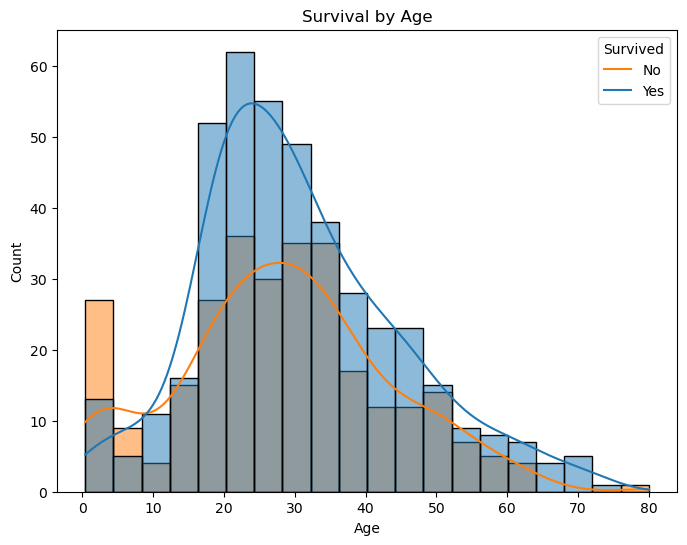

In [8]:
# Visualize survival by age
plt.figure(figsize=(8, 6))
sns.histplot(data=train_data, x='Age', hue='Survived', kde=True)
plt.title('Survival by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

In [9]:
# Visualize survival by the number of siblings/spouses (SibSp)
plt.figure(figsize=(8, 6))
sns.countplot(x='SibSp', hue='Survived', data train_data)
plt.title('Survival by Siblings/Spouses')
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (768189916.py, line 3)

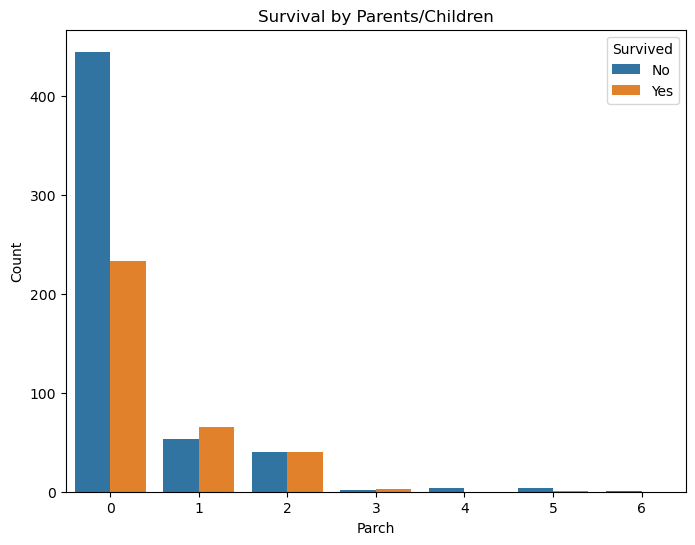

In [10]:
# Visualize survival by the number of parents/children (Parch)
plt.figure(figsize=(8, 6))
sns.countplot(x='Parch', hue='Survived', data=train_data)
plt.title('Survival by Parents/Children')
plt.xlabel('Parch')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

In [11]:
# Fill missing values in the 'Age' column with the median
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

In [15]:
# One-hot encode the 'Sex' column for both train and test data
train_data = pd.get_dummies(train_data, columns=['Sex'], prefix=['Sex'])
test_data = pd.get_dummies(test_data, columns=['Sex'], prefix=['Sex'])


In [16]:
# Features to include
features = ['Pclass', 'SibSp', 'Parch', 'Age']

In [17]:
# Define features and target variable
X = train_data[features]
y = train_data['Survived']

In [18]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Define the neural network model
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),  # Input layer with the correct shape
    keras.layers.Dense(4, activation='relu'),  # Hidden layer with 64 units and ReLU activation
    keras.layers.Dense(32, activation='relu'),  # Additional hidden layer (optional)
    keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])


In [20]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


6/6 [==============================] - 0s 4ms/step


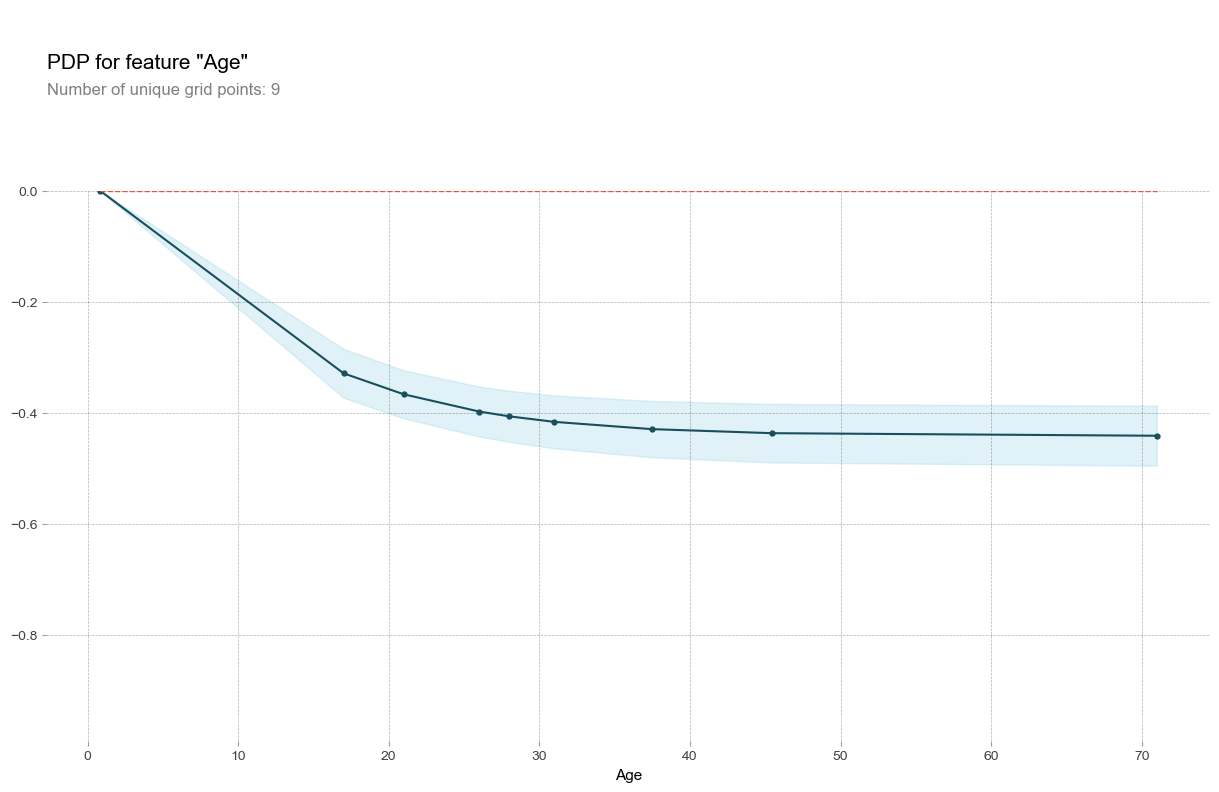

In [21]:
# Create partial dependence plots
# 'Age' partial dependence plot
age_pdp = pdp.pdp_isolate(model=model, dataset=X_val, model_features=X_val.columns, feature='Age')
pdp.pdp_plot(age_pdp, 'Age')
plt.show()


6/6 [==============================] - 0s 3ms/step


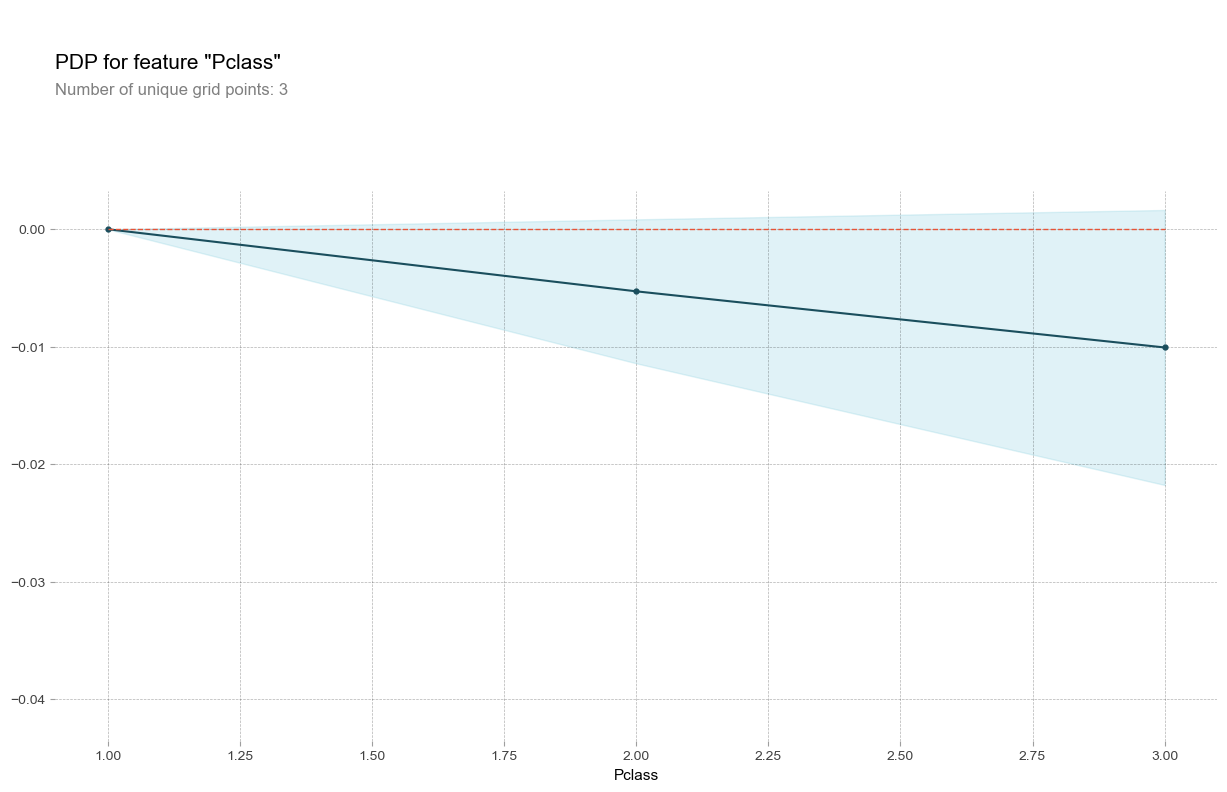

In [22]:
# 'Pclass' partial dependence plot
pclass_pdp = pdp.pdp_isolate(model=model, dataset=X_val, model_features=X_val.columns, feature='Pclass')
pdp.pdp_plot(pclass_pdp, 'Pclass')
plt.show()

In [23]:
# Get the weights of the first hidden layer
first_hidden_layer_weights = model.layers[1].get_weights()[0]

In [24]:
# Calculate feature importance based on the weights
feature_importance = np.mean(np.abs(first_hidden_layer_weights), axis=1)


In [25]:
# Get the feature names
feature_names = X.columns

In [26]:
# Sort and print feature importance
sorted_feature_importance = pd.Series(feature_importance, index=feature_names).sort_values(ascending=False)
print("Feature Importance:")
print(sorted_feature_importance)

Feature Importance:
Age       0.237467
Parch     0.218794
SibSp     0.201716
Pclass    0.201221
dtype: float32


In [28]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/50
23/23 [==============================] - 3s 30ms/step - loss: 0.9273 - accuracy: 0.6334 - val_loss: 0.6504 - val_accuracy: 0.6257
Epoch 2/50
23/23 [==============================] - 0s 8ms/step - loss: 0.6566 - accuracy: 0.6573 - val_loss: 0.6440 - val_accuracy: 0.6257
Epoch 3/50
23/23 [==============================] - 0s 8ms/step - loss: 0.6372 - accuracy: 0.6489 - val_loss: 0.6430 - val_accuracy: 0.6313
Epoch 4/50
23/23 [==============================] - 0s 9ms/step - loss: 0.6369 - accuracy: 0.6433 - val_loss: 0.6427 - val_accuracy: 0.6313
Epoch 5/50
23/23 [==============================] - 0s 9ms/step - loss: 0.6358 - accuracy: 0.6447 - val_loss: 0.6399 - val_accuracy: 0.6425
Epoch 6/50
23/23 [==============================] - 0s 9ms/step - loss: 0.6338 - accuracy: 0.6419 - val_loss: 0.6416 - val_accuracy: 0.6313
Epoch 7/50
23/23 [==============================] - 0s 10ms/step - loss: 0.6333 - accuracy: 0.6404 - val_loss: 0.6372 - val_accuracy: 0.6313
Epoch 8/50
23/23 [

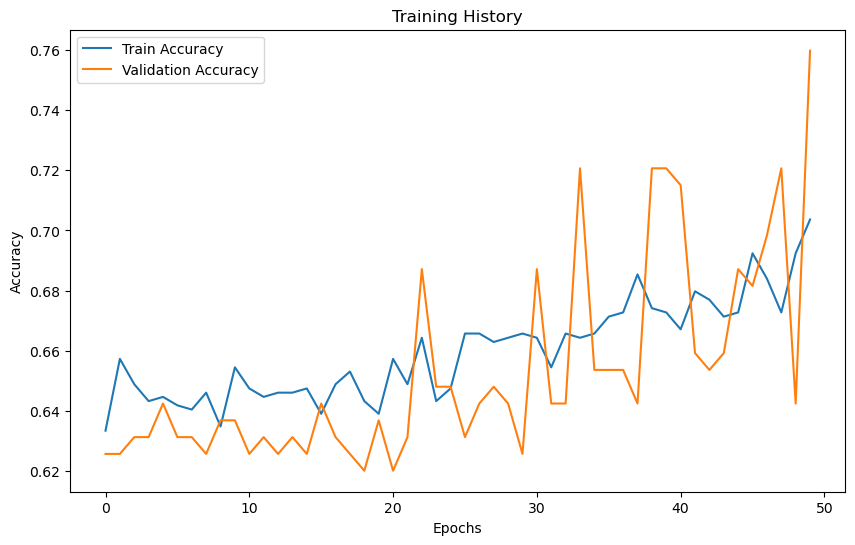

6/6 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       105
           1       0.75      0.64      0.69        74

    accuracy                           0.76       179
   macro avg       0.76      0.74      0.75       179
weighted avg       0.76      0.76      0.76       179



In [30]:
# Plot training history (optional)
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

y_pred = model.predict(X_val)  # Replace X_val with your validation set features
y_pred_binary = (y_pred >= 0.5).astype(int)  # Convert probabilities to binary predictions
report = classification_report(y_val, y_pred_binary)
print(report)

In [31]:
# Make predictions on the test data
X_test = test_data[features]  # Assuming you have already defined 'features' for the test data
y_test_pred = model.predict(X_test)
y_test_pred_binary = (y_test_pred >= 0.5).astype(int)

14/14 [==============================] - 0s 3ms/step


In [32]:
# Compare the model's predictions to the actual values
comparison = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred_binary.ravel()})


In [33]:
# Create a DataFrame with PassengerId and Survived columns
submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": y_test_pred_binary.ravel()  # Reshape to 1D array
})

In [34]:
report = classification_report(y_val, y_pred_binary)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       105
           1       0.75      0.64      0.69        74

    accuracy                           0.76       179
   macro avg       0.76      0.74      0.75       179
weighted avg       0.76      0.76      0.76       179



In [35]:
# Save the DataFrame to a CSV file
submission.to_csv("titanic_submission.csv", index=False)